# Implementation of Martin's Classen crack orientation concept

In [1]:
import sympy as sp
import numpy as np

<img src="martin concept.png" width="700"/> 

## Symbol representation

In [2]:
sigma_x0, sigma_z0, tau_0 = sp.symbols('sigma_x0, sigma_z0, tau_0')
beta = sp.Symbol(r'\beta')
beta

\beta

## Tranformation of global stresses into cosine components

\begin{align}
\sigma_{x0} = 
\left[
\begin{array}{cc}
\sigma_{x0} \cos \beta \\
\sigma_{x0} \sin \beta \\
\end{array}
\right]
\end{align}

In [3]:
sigma_x0_components = sp.Matrix([sigma_x0 * sp.cos(beta), sigma_x0 * sp.sin(beta)])
sigma_x0_components

Matrix([
[sigma_x0*cos(\beta)],
[sigma_x0*sin(\beta)]])

\begin{align}
\sigma_{z0} = 
\left[
\begin{array}{cc}
\sigma_{z0} \cos \beta \\
\sigma_{z0} \sin \beta \\
\end{array}
\right]
\end{align}

In [4]:
sigma_z0_components = sp.Matrix([sigma_z0 * sp.cos(beta), sigma_z0 * sp.sin(beta)])
sigma_z0_components

Matrix([
[sigma_z0*cos(\beta)],
[sigma_z0*sin(\beta)]])

\begin{align}
\tau_{0} = 
\left[
\begin{array}{cc}
\tau_{0} \cos \beta \\
\tau_{0} \sin \beta \\
\end{array}
\right]
\end{align}

In [5]:
tau_0_components = sp.Matrix([tau_0 * sp.cos(beta), tau_0 * sp.sin(beta)])
tau_0_components

Matrix([
[tau_0*cos(\beta)],
[tau_0*sin(\beta)]])

## Principle Stress tensor

\begin{align}
\sigma_{ij} = 
\left[
\begin{array}{cc}
\sigma_{1} & 0 \\
0 & \sigma_{2}
\end{array}
\right]
\end{align}

In [6]:
sigma_1, sigma_2 = sp.symbols('sigma_1, sigma_2')
sigma_ps = sp.Matrix([[sigma_1, 0], [0, sigma_2]])
sigma_ps

Matrix([
[sigma_1,       0],
[      0, sigma_2]])

## Triangle 1

<img src="triangle 1.png" width="400"/> 

## Principle Stress Tensor equivalence from triangle 1

In [7]:
sigma_ps_equiv_1 = sp.simplify(sp.Matrix([[(sigma_z0_components[0] + tau_0_components[1])/sp.cos(beta), 0], 
                            [0, (sigma_z0_components[1] - tau_0_components[0])//sp.sin(beta)]]))
sigma_ps_equiv_1

Matrix([
[sigma_z0 + tau_0*tan(\beta),                                  0],
[                          0, floor(sigma_z0 - tau_0/tan(\beta))]])

In [8]:
sig_ps_1 = sp.Eq(sigma_ps, sigma_ps_equiv_1)
sig_ps_1

Eq(Matrix([
[sigma_1,       0],
[      0, sigma_2]]), Matrix([
[sigma_z0 + tau_0*tan(\beta),                                  0],
[                          0, floor(sigma_z0 - tau_0/tan(\beta))]]))

In [12]:
beta_solved = sp.solve(sp.Eq(sigma_ps[0,0], sigma_ps_equiv_1[0,0]), beta)[0]
beta_solved

atan((sigma_1 - sigma_z0)/tau_0)

In [14]:
f_ct = sp.Symbol('f_ct')
beta_subs = beta_solved.subs(sigma_1, f_ct)
beta_subs

atan((f_ct - sigma_z0)/tau_0)

In [15]:
get_beta = sp.lambdify((sigma_1, sigma_z0, tau_0), beta_solved)
get_beta

<function _lambdifygenerated(sigma_1, sigma_z0, tau_0)>

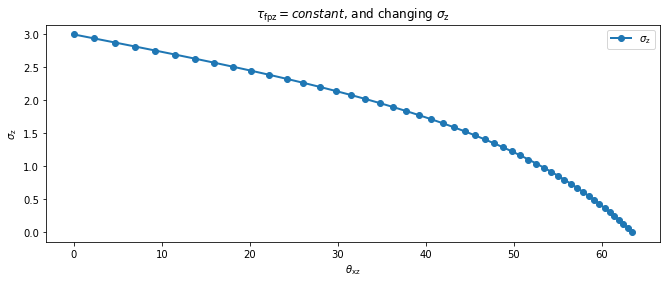

In [16]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

f_ct_val = 3
eta = 0.5
tau_xx = eta * f_ct_val
sigma_z = np.linspace(0, 3, 50)
theta_xz = get_beta(f_ct_val, sigma_z, tau_xx)

ax1.plot(theta_xz * 180/ np.pi,  sigma_z, 'o-', lw= 2, label = r'$\sigma_{\mathrm{z}}}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\sigma_{\mathrm{z}}$');
ax1.set_title(r'$\tau_{\mathrm{fpz}} = constant$, and changing $\sigma_{\mathrm{z}}$')
ax1.legend()

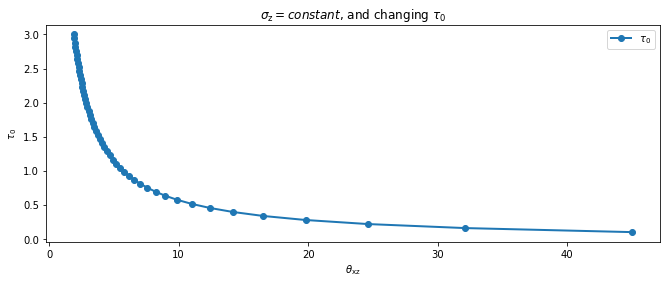

In [24]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

f_ct_val = 3
sigma_z = 2.9
tau_xx = np.linspace(0.1, 3, 50)
theta_xz = get_beta(f_ct_val, sigma_z, tau_xx)

ax1.plot(theta_xz * 180/ np.pi,  tau_xx, 'o-', lw= 2, label = r'$\tau_{\mathrm{0}}}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\tau_{\mathrm{0}}$');
ax1.set_title(r'$\sigma_{\mathrm{z}} = constant$, and changing $\tau_{\mathrm{0}}$')
ax1.legend()

In [26]:
f_ct_val = 3
tau_xx_num = 10
tau_xx = np.linspace(0.1,1.5, tau_xx_num)
#eta = 0.2
#tau_xx = eta * f_ct_val
sig_z_num = 10
sigma_z = np.linspace(0, 2.9, sig_z_num)
beta = np.zeros([tau_xx_num, sig_z_num])
for j in  range(len(sigma_z)):
    #print('sigma_z =', sigma_z[j])
    for i in range(len(tau_xx)):
        #print('tau_fpz =', tau_fpz[i])
        beta_xz = get_beta(f_ct_val, sigma_z[j], tau_xx[i])
        beta[j, i] = beta_xz
print(beta)

[[1.53747533 1.4858163  1.43460757 1.384107   1.33455107 1.2861491
  1.23907932 1.19348687 1.14948347 1.10714872]
 [1.53346927 1.47564881 1.41845882 1.36225473 1.30735523 1.25403326
  1.20251076 1.15295706 1.10549034 1.06018166]
 [1.52836897 1.46272843 1.39800838 1.33471621 1.27329209 1.21409498
  1.15739652 1.10338226 1.05215834 1.00376195]
 [1.52165559 1.44576884 1.37129993 1.29900417 1.22950429 1.1632695
  1.10061286 1.0417032  0.98658637 0.93521062]
 [1.51242117 1.4225415  1.33500577 1.25099509 1.17140331 1.09681317
  1.02751697 0.96356532 0.90482709 0.85104763]
 [1.49892036 1.38883164 1.28301329 1.18341248 1.09127703 1.00717913
  0.93114629 0.86282925 0.80165689 0.74695557]
 [1.47731955 1.33564536 1.20292466 1.08246238 0.97561681 0.88223717
  0.80126985 0.73126391 0.67069647 0.61814423]
 [1.43726728 1.24011744 1.06623589 0.92016945 0.80054852 0.70339072
  0.62430626 0.55943895 0.50569401 0.46068026]
 [1.33823938 1.02651584 0.79873071 0.64035647 0.52903047 0.44834268
  0.38789996 0

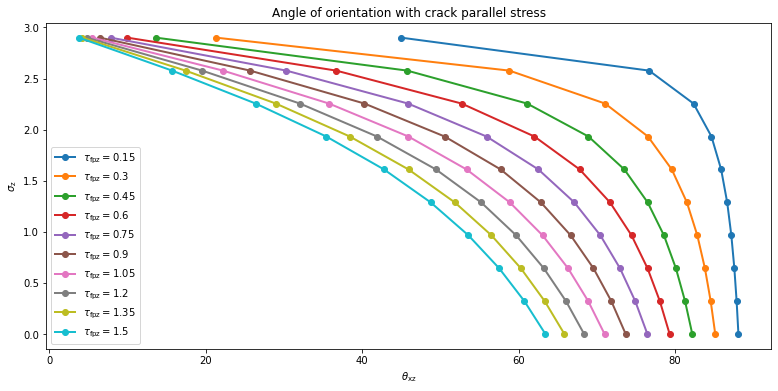

In [28]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(13,6))
ax1.plot(beta[:,0] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.15}$')
ax1.plot(beta[:,1] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.3}$')
ax1.plot(beta[:,2] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.45}$')
ax1.plot(beta[:,3] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.6}$')
ax1.plot(beta[:,4] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.75}$')
ax1.plot(beta[:,5] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.9}$')
ax1.plot(beta[:,6] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.05}$')
ax1.plot(beta[:,7] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.2}$')
ax1.plot(beta[:,8] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.35}$')
ax1.plot(beta[:,9] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.5}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\sigma_{\mathrm{z}}$');
ax1.set_title(r'Angle of orientation with crack parallel stress')
ax1.legend()

## Triangle 2

<img src="triangle 2.png" width="300"/> 

## Principle Stress Tensor equivalence from triangle 2

In [9]:
sigma_ps_equiv_2 = sp.simplify(sp.Matrix([[(sigma_x0_components[1] + tau_0_components[0])/sp.sin(beta), 0], 
                            [0, (sigma_x0_components[0] - tau_0_components[1])//sp.cos(beta)]]))
sigma_ps_equiv_2

Matrix([
[sigma_x0 + tau_0/tan(\beta),                                  0],
[                          0, floor(sigma_x0 - tau_0*tan(\beta))]])

In [10]:
sig_ps_2 = sp.Eq(sigma_ps, sigma_ps_equiv_2)
sig_ps_2

Eq(Matrix([
[sigma_1,       0],
[      0, sigma_2]]), Matrix([
[sigma_x0 + tau_0/tan(\beta),                                  0],
[                          0, floor(sigma_x0 - tau_0*tan(\beta))]]))

## $\sigma_{x0}$, $\tau_{0}$ calculation based on principal stress criteria

In [11]:
tau_0_solve = sp.solve(sp.Eq(sigma_ps[0,0], sigma_ps_equiv_1[0,0]), tau_0)[0]
tau_0_solve

(sigma_1 - sigma_z0)/tan(\beta)

In [12]:
sigma_x0_solve = sp.solve(sp.Eq(sigma_ps[0,0], sigma_ps_equiv_2[0,0]).subs(tau_0, tau_0_solve), sigma_x0)[0]
sigma_x0_solve

sigma_1 - sigma_1/tan(\beta)**2 + sigma_z0/tan(\beta)**2

### Global stress tensor
\begin{align}
\sigma_{ij} = 
\left[
\begin{array}{cc}
\sigma_{x0} & \tau_0 \\
\tau_0 & \sigma_{z0}
\end{array}
\right]
\end{align}

In [13]:
sigma_ij = sp.simplify(sp.Matrix([[sigma_x0_solve, tau_0_solve], 
                            [tau_0_solve, sigma_z0]]))
sigma_ij

Matrix([
[sigma_1 - sigma_1/tan(\beta)**2 + sigma_z0/tan(\beta)**2, (sigma_1 - sigma_z0)/tan(\beta)],
[                         (sigma_1 - sigma_z0)/tan(\beta),                        sigma_z0]])

### Ratio of principal stresses
\begin{equation}
\alpha = \frac{\sigma_1}{\sigma_2}
\end{equation}

In [14]:
alpha = sigma_ps_equiv_1[0,0] / sigma_ps_equiv_1[1,1]
alpha

(sigma_z0 + tau_0*tan(\beta))/floor(sigma_z0 - tau_0/tan(\beta))